In [1]:
import pickle

# https://github.com/RaRe-Technologies/gensim
import gensim
from gensim.models import CoherenceModel, LdaModel, Phrases
from gensim.corpora import Dictionary

# https://github.com/bmabey/pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
TOKEN_NO_BELLOW_FREQ   = 10 # sachant qu'il y a moins de 3000 documents dans ce cas
TOKEN_NO_ABOVE_PERCENT = 0.3
MALLET_PATH = 'mallet-2.0.8/bin/mallet'
# uses the Mallet LDA implementation : http://mallet.cs.umass.edu/

In [3]:
with (open("_outputs/tokens_transports.pickle", "rb")) as openfile:
    data_lemmatized = pickle.load(openfile)

In [4]:
len(data_lemmatized)

2147

In [5]:
bigram = gensim.models.Phrases(data_lemmatized, min_count=10)

In [6]:
data_lemmatized = [bigram[line] for line in data_lemmatized]

In [7]:
data_lemmatized[4]

['ballot',
 'homme',
 'agresse',
 'sexuellement',
 'policier',
 'charger',
 'agression_sexuel',
 'transport',
 'masturber',
 'condamner',
 'mois',
 'prison',
 'sursis']

In [8]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(data_lemmatized)

# Filter out words that occur less than TOKEN_NO_BELLOW_FREQ documents, 
# or more than TOKEN_NO_ABOVE_PERCENT% of the documents.
dictionary.filter_extremes(no_below=TOKEN_NO_BELLOW_FREQ, no_above=TOKEN_NO_ABOVE_PERCENT)

In [9]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(item) for item in data_lemmatized]

In [10]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 389
Number of documents: 2147


In [11]:
# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

In [12]:
def save_pyLDAvisFromMallet(MalletModel, num_topics, corpus, dictionary):
    # save visualisation
    # https://stackoverflow.com/questions/50340657/pyldavis-with-mallet-lda-implementation-ldamallet-object-has-no-attribute-inf
    model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(MalletModel)
    p = pyLDAvis.gensim.prepare(model, corpus, dictionary)
    pyLDAvis.save_html(p, 'graphs/Transports_LDA_Mallet_{}_topics.html'.format(num_topics))

In [13]:
def compute_coherence_values(dictionary, id2word, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    x_values : topics range
    """
    coherence_values = []
    model_list = []
    x_values = range(start, limit, step)
    for num_topics in x_values:
        MalletModel = gensim.models.wrappers.LdaMallet(MALLET_PATH, corpus=corpus, num_topics=num_topics, 
                                                       id2word=id2word, random_seed = 30)
        model_list.append(MalletModel)
        save_pyLDAvisFromMallet(MalletModel, num_topics, corpus, dictionary) #save visualisation
        coherencemodel = CoherenceModel(model=MalletModel, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print('Topic done n°{}'.format(num_topics))

    return model_list, x_values, coherence_values

In [14]:
def show_coherence_graph(x_values, coherence_values):
    plt.plot(x_values, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [15]:
model_list, x_values, coherence_values = compute_coherence_values(dictionary=dictionary, id2word=id2word, 
                                                        corpus=corpus, texts=data_lemmatized, 
                                                        start=2, limit=13 , step=1)

Topic done n°2
Topic done n°3
Topic done n°4
Topic done n°5
Topic done n°6
Topic done n°7
Topic done n°8
Topic done n°9
Topic done n°10
Topic done n°11
Topic done n°12


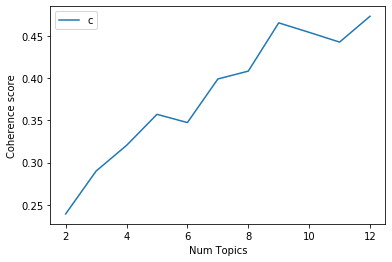

In [16]:
show_coherence_graph(x_values, coherence_values)

### Make topic clouds

In [17]:
def make_topic_words_cloud(nb, model):
    topic_stats = dict(model.show_topic(nb, 100))
    wordcloud = WordCloud(max_words=100, background_color="white").fit_words(topic_stats)
    fig, ax = plt.subplots()
    fig.dpi = 150
    fig.set_size_inches(7, 5)
    ax = plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [18]:
topic9 = model_list[9]

# Topic 1/9 : foule / sentiment de malaise

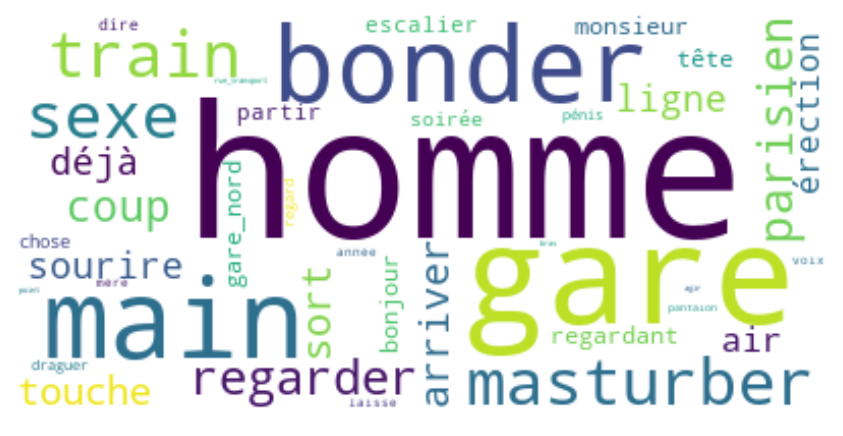

In [19]:
make_topic_words_cloud(0, topic9)

# Topic 2/9 : vivre normalement ?

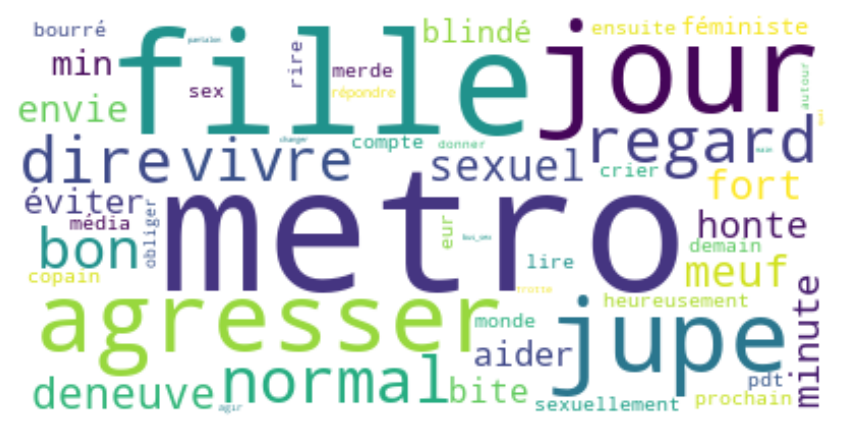

In [20]:
make_topic_words_cloud(1, topic9)

# Topic 3/9 : Peur

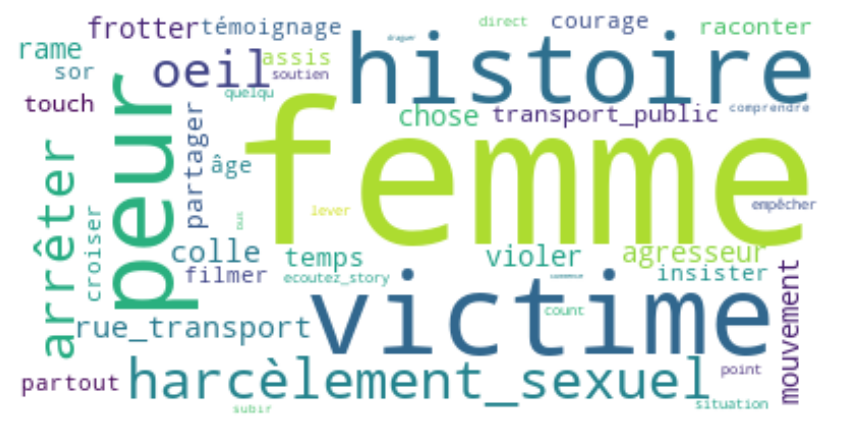

In [21]:
make_topic_words_cloud(2, topic9)

# TOPIC 4/9 : Prevers ?

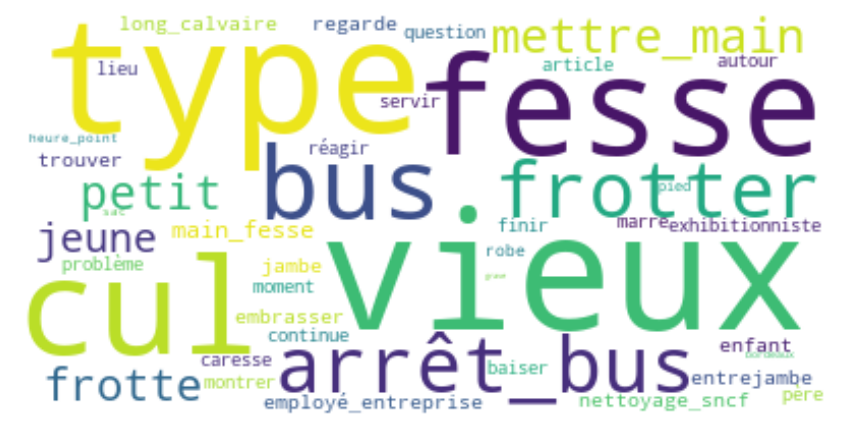

In [22]:
make_topic_words_cloud(3, topic9)

# TOPIC 5/9 : Politique dans les transports / travail

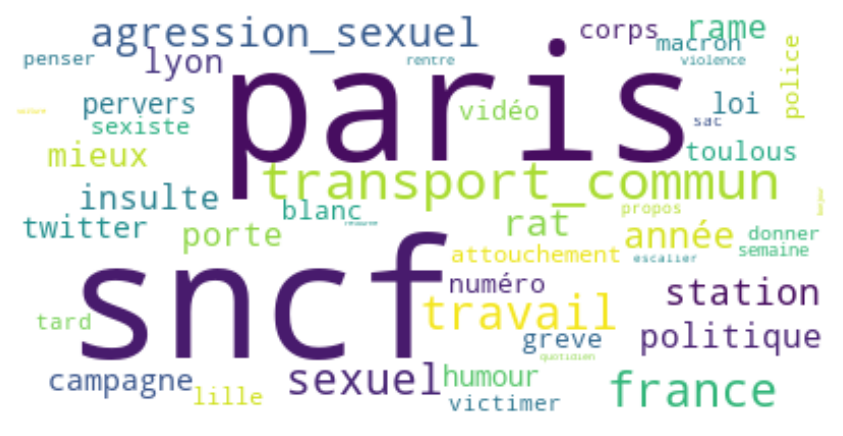

In [23]:
make_topic_words_cloud(4, topic9)

# TOPIC 6/9 : Ne pas voir / minimiser

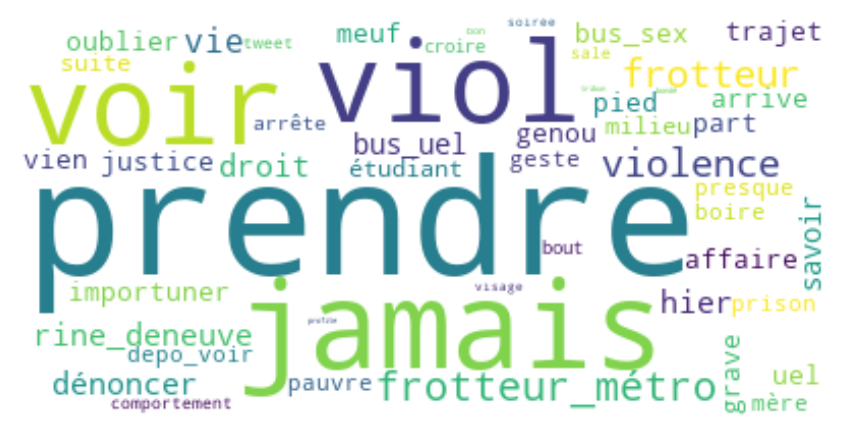

In [24]:
make_topic_words_cloud(5, topic9)

# TOPIC 7/9 : Toucher

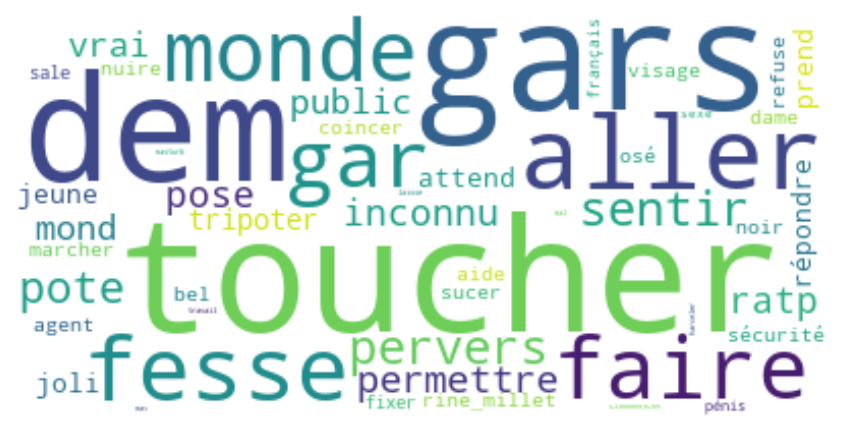

In [25]:
make_topic_words_cloud(6, topic9)

# TOPIC 8/9 : sentiment de malaise

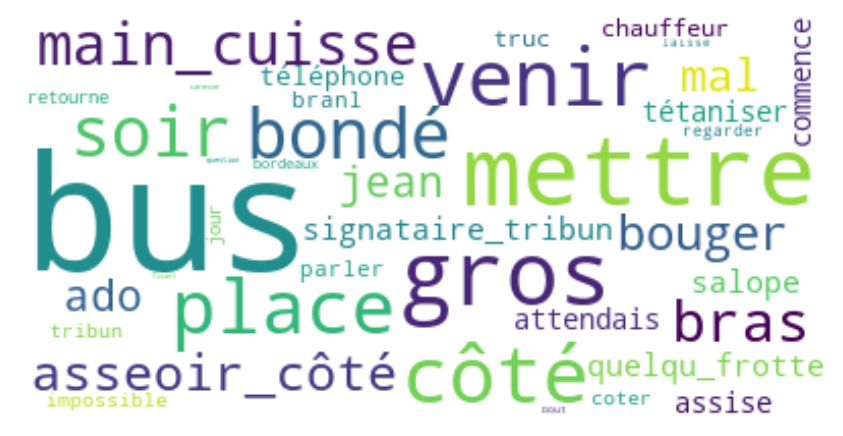

In [28]:
make_topic_words_cloud(7, topic9)

# TOPIC 9/9 : Se faire suivre

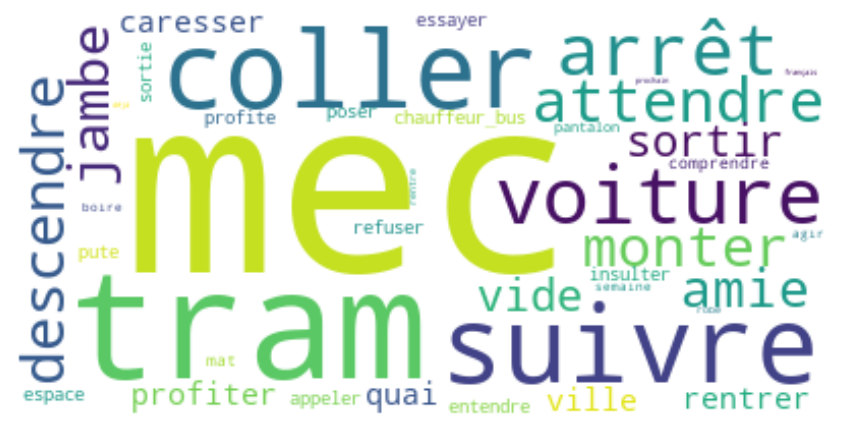

In [29]:
make_topic_words_cloud(8, topic9)